In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('/content/data.csv')


In [6]:
import numpy as np

# Mean, Median, Std Dev of house prices
price_mean = np.mean(df['price'])
price_median = np.median(df['price'])
price_std = np.std(df['price'])

print("Mean Price:", price_mean)
print("Median Price:", price_median)
print("Standard Deviation of Price:", price_std)


Mean Price: 551962.9884732141
Median Price: 460943.46153850004
Standard Deviation of Price: 563773.4128352863


In [7]:
# Max and Min values using NumPy
max_sqft = np.max(df['sqft_living'])
min_sqft = np.min(df['sqft_living'])

print("Maximum Sqft Living:", max_sqft)
print("Minimum Sqft Living:", min_sqft)


Maximum Sqft Living: 13540
Minimum Sqft Living: 370


In [8]:
# Z-score normalization for 'price'
price_mean = np.mean(df['price'])
price_std = np.std(df['price'])

df['price_z_np'] = (df['price'] - price_mean) / price_std

# Display first few values
print(df[['price', 'price_z_np']].head())


       price  price_z_np
0   313000.0   -0.423864
1  2384000.0    3.249598
2   342000.0   -0.372424
3   420000.0   -0.234071
4   550000.0   -0.003482


In [9]:
# Filter houses with price greater than the mean using NumPy
high_price_houses = df[df['price'] > np.mean(df['price'])]

print("Number of houses priced above average:", len(high_price_houses))
high_price_houses[['price', 'bedrooms', 'city']].head()


Number of houses priced above average: 1675


,price,bedrooms,city
1,2384000.0,5.0,Seattle
9,640000.0,4.0,Seattle
11,1400000.0,4.0,Seattle
12,588500.0,3.0,Sammamish
14,1200000.0,5.0,Seattle


In [10]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots
%matplotlib inline


In [11]:


df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_z_np
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482


In [12]:
# Check data types and structure
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isna().sum())

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Confirm the change
print("\nDate column type after conversion:")
print(df['date'].dtype)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 

In [13]:
# Group by number of bedrooms and calculate average price
avg_price_by_bedrooms = df.groupby('bedrooms')['price'].mean().sort_index()
print("Average Price by Number of Bedrooms:\n", avg_price_by_bedrooms)

# Pivot table: Average price by city and condition
pivot = pd.pivot_table(df, values='price', index='city', columns='condition', aggfunc='mean')
print("\nPivot Table - Average Price by City and Condition:")
print(pivot.head())  # Show first few rows


Average Price by Number of Bedrooms:
 bedrooms
0.0    1.195324e+06
1.0    2.740763e+05
2.0    3.916219e+05
3.0    4.886130e+05
4.0    6.351194e+05
5.0    7.701860e+05
6.0    8.173628e+05
7.0    1.049429e+06
8.0    1.155000e+06
9.0    5.999990e+05
Name: price, dtype: float64

Pivot Table - Average Price by City and Condition:
condition                  1         2              3              4  \
city                                                                   
Algona                   NaN       NaN  201610.000000  230000.000000   
Auburn                   NaN  325000.0  326396.496122  256873.208791   
Beaux Arts Village       NaN       NaN            NaN  745000.000000   
Bellevue            365000.0       NaN  964193.383451  713819.653623   
Black Diamond            NaN       NaN  360707.142857  265750.000000   

condition                       5  
city                               
Algona                        NaN  
Auburn              222409.090909  
Beaux Arts Village      

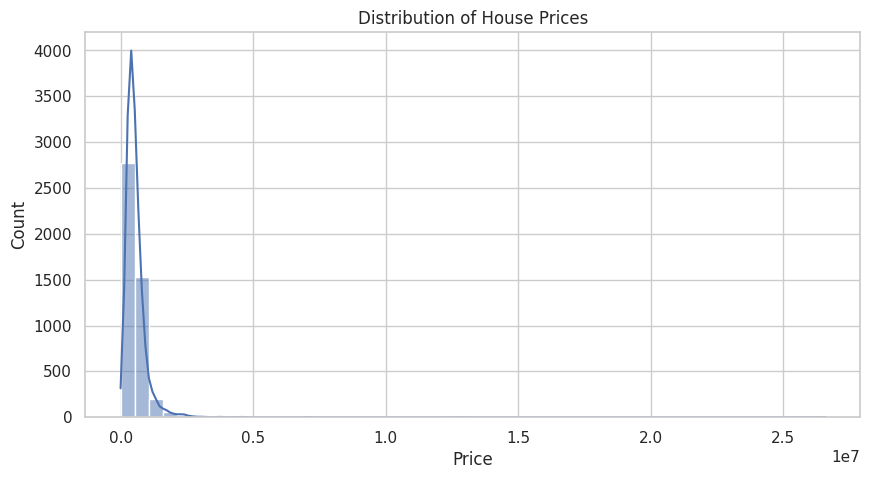

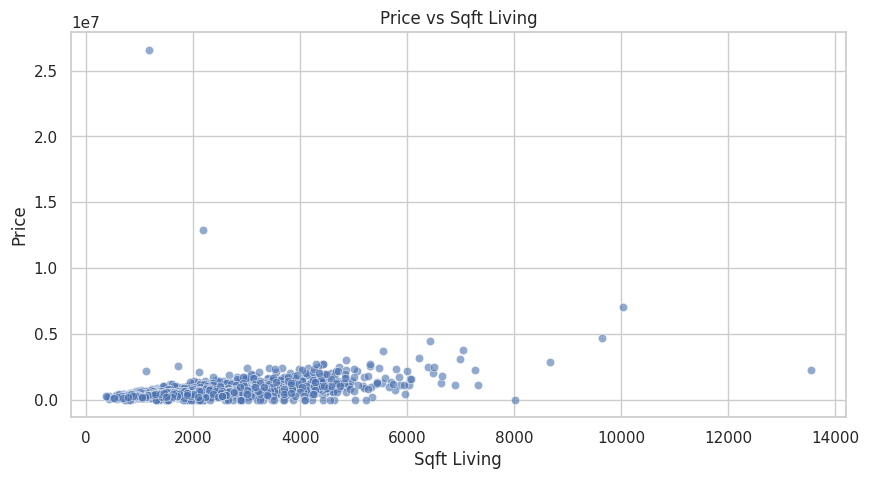

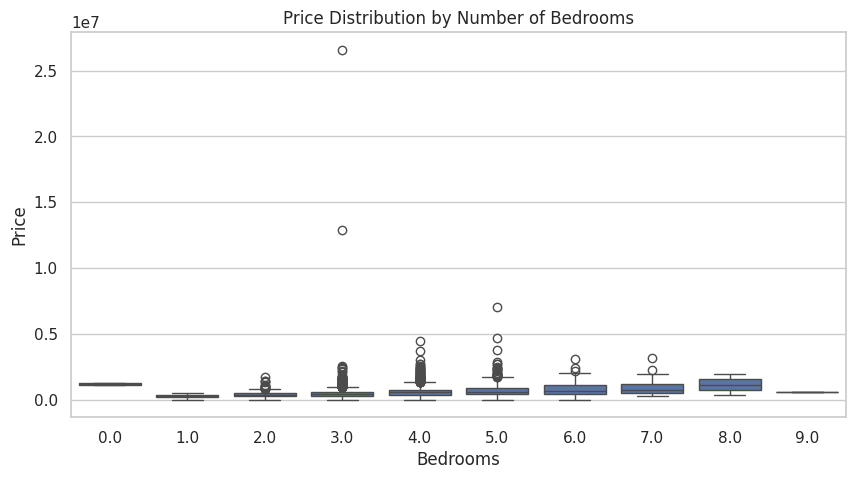

In [14]:
# Set style for plots
sns.set(style="whitegrid")

# 📊 Histogram of house prices
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# 📊 Scatter plot: sqft_living vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6)
plt.title('Price vs Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

# 📊 Box plot: Price vs Number of Bedrooms
plt.figure(figsize=(10, 5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()


In [15]:
from scipy.stats import zscore

# Apply Z-score normalization on 'price' and 'sqft_living'
df['price_z'] = zscore(df['price'])
df['sqft_living_z'] = zscore(df['sqft_living'])

# Show a few rows with the new normalized values
print(df[['price', 'price_z', 'sqft_living', 'sqft_living_z']].head())

# 📌 Filter rows where price is within ±2 standard deviations
filtered_df = df[(df['price_z'] > -2) & (df['price_z'] < 2)]

print(f"\nOriginal dataset size: {df.shape[0]}")
print(f"Filtered dataset size (within ±2 std dev): {filtered_df.shape[0]}")


       price   price_z  sqft_living  sqft_living_z
0   313000.0 -0.423864         1340      -0.829971
1  2384000.0  3.249598         3650       1.568528
2   342000.0 -0.372424         1930      -0.217367
3   420000.0 -0.234071         2000      -0.144686
4   550000.0 -0.003482         1940      -0.206984

Original dataset size: 4600
Filtered dataset size (within ±2 std dev): 4513
